# 引入：向量化

向量化的数组运算比纯python同等程度的运算要快很多。

假设我们要在一组值（网格型）上计算函数sqrt(x^2 + y^2)。np.meshqrid函数接收两个1维的数组，产生一个2维的矩阵，对应于所有两个数组中(x, y)的组合

先举例说明meshgrid的效果。meshgrid函数用两个坐标轴上的点在平面上画网格，用法如下：  
  [X, Y]=meshgrid(x,y)  
  [X, Y]=meshgrid(x)与[X, Y]=meshgrid(x,x)是等同的  
  [X, Y, Z]=meshgrid(x,y,z)生成三维数组，可用来计算三变量的函数和绘制三维立体图


以[X, Y] = meshgrid(x,y)为例进行介绍  
[X, Y]=meshgrid(x,y)是将向量x和y定义的区域转换成矩阵X和Y，其中矩阵X的行向量是向量x的复制，矩阵Y的列向量是向量y的复制，（下面的代码中X和Y是数组，统称为矩阵）

In [3]:
import numpy as np

In [4]:
m, n = (5, 3)
x = np.linspace(0, 1, m)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y)
x

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [17]:
y

array([ 0. ,  0.5,  1. ])

In [18]:
X

array([[ 0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [ 0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]])

In [19]:
Y

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

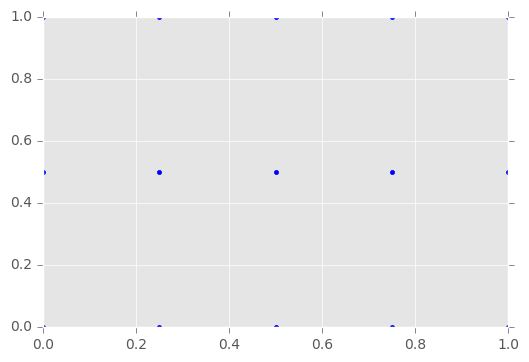

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.plot(X ,Y, marker='.', color='blue', linestyle='none')

可以用zip得到网格平面上坐标点的数据  
zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。

In [22]:
z = [i for i in zip(X.flat, Y.flat)]
z

[(0.0, 0.0),
 (0.25, 0.0),
 (0.5, 0.0),
 (0.75, 0.0),
 (1.0, 0.0),
 (0.0, 0.5),
 (0.25, 0.5),
 (0.5, 0.5),
 (0.75, 0.5),
 (1.0, 0.5),
 (0.0, 1.0),
 (0.25, 1.0),
 (0.5, 1.0),
 (0.75, 1.0),
 (1.0, 1.0)]

In [31]:
points = np.arange(-5, 5, 0.01)

In [32]:
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [33]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

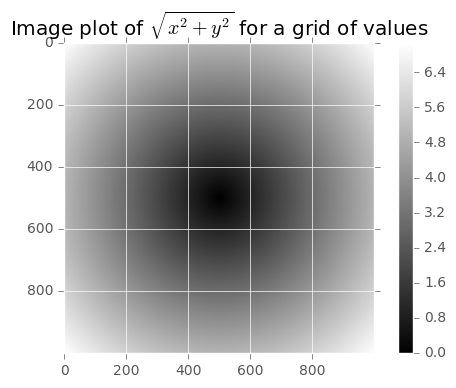

In [35]:
plt.imshow(z, cmap=plt.cm.gray);plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")